In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("./Datasets/datos_incompletox.txt")
data1=data.copy()
data2=data.copy()
data3=data.copy()
data4=data.copy()
data5=data.copy()
data6=data.copy()
data


,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.0,NaN,NaN
1,Marketing,39,14.0,1009.0,NaN
2,Finanzas,41,15.0,1405.0,6.0
3,Proyectos,42,NaN,1450.0,7.0
4,Informatica,42,12.0,1249.0,NaN


# Verifcar cantidad de datos nulos por columnas

In [3]:
#data.isnull()#muestra los datos nulos con true mostrando todos los datos
cantidad_nulos_por_columna = data.isnull().sum() #Muestra cantidad de datos nulos por columnas
#cantidad_nulos_por_columna=(data.isnull().sum()/data.size)*100 #Muestra cantidad de datos nulos por columnas en %
print(cantidad_nulos_por_columna)

Departamento                0
hora(semanal)               0
Numero de empleados         1
Salario promedio mensual    1
Experiencia promedio        3
dtype: int64


# Dropna : eliminar filas o columnas con valores nulos

In [4]:
#elimina filas que contengan al menos un valor nulo
data1=data1.dropna()
data1

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
2,Finanzas,41,15.0,1405.0,6.0


In [5]:
# eliminar columnas que tengan al menos un valor nulo filas (axis=0) o columnas (axis=1) por defeccto (axis=0)
data2 = data2.dropna(axis=1)
data2

,Departamento,hora(semanal)
0,Recursos humanos,30
1,Marketing,39
2,Finanzas,41
3,Proyectos,42
4,Informatica,42


In [6]:
# how: Eliminar filas que contengan todos los valores nulos 'all' filas o columnas con puros nulos 'any'por defecto
data3=data3.dropna(axis=1,how='all')
data3

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.0,NaN,NaN
1,Marketing,39,14.0,1009.0,NaN
2,Finanzas,41,15.0,1405.0,6.0
3,Proyectos,42,NaN,1450.0,7.0
4,Informatica,42,12.0,1249.0,NaN


In [7]:
# thresh: Eliminar filas que no tengan al menos 4 valores que no sean nulos
data4 =data4.dropna(thresh=4)
data4

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
1,Marketing,39,14.0,1009.0,NaN
2,Finanzas,41,15.0,1405.0,6.0
3,Proyectos,42,NaN,1450.0,7.0
4,Informatica,42,12.0,1249.0,NaN


In [8]:
# Eliminar filas que contengan valores nulos en las columnas 'A' y 'B'
data5=data5.dropna(subset=['Numero de empleados','Salario promedio mensual'])
data5

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
1,Marketing,39,14.0,1009.0,NaN
2,Finanzas,41,15.0,1405.0,6.0
4,Informatica,42,12.0,1249.0,NaN


In [9]:
#inplace: Eliminar filas que contengan al menos un valor nulo y modificar el DataFrame original
#print(data6)
data7=data6.dropna(inplace=False)
data7

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
2,Finanzas,41,15.0,1405.0,6.0


# rellenar datos nulos 

In [10]:
dataA=data.copy()
dataB=data.copy()
dataC=data.copy()


In [11]:
#rellena todos los nulos con 100
dataA=dataA.fillna(100) 
dataA

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.0,100.0,100.0
1,Marketing,39,14.0,1009.0,100.0
2,Finanzas,41,15.0,1405.0,6.0
3,Proyectos,42,100.0,1450.0,7.0
4,Informatica,42,12.0,1249.0,100.0


In [12]:
#Este método "bfill" rellena los datos nulos, en base al valor de fila de abajo
#Este metodo "fbill" rellena los datos nulos, en base al valor de fila de arriba 
dataB=dataB.fillna(method="bfill")
dataB


,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.0,1009.0,6.0
1,Marketing,39,14.0,1009.0,6.0
2,Finanzas,41,15.0,1405.0,6.0
3,Proyectos,42,12.0,1450.0,7.0
4,Informatica,42,12.0,1249.0,NaN


array([[<Axes: title={'center': 'hora(semanal)'}>,
        <Axes: title={'center': 'Numero de empleados'}>],
       [<Axes: title={'center': 'Salario promedio mensual'}>,
        <Axes: title={'center': 'Experiencia promedio'}>]], dtype=object)

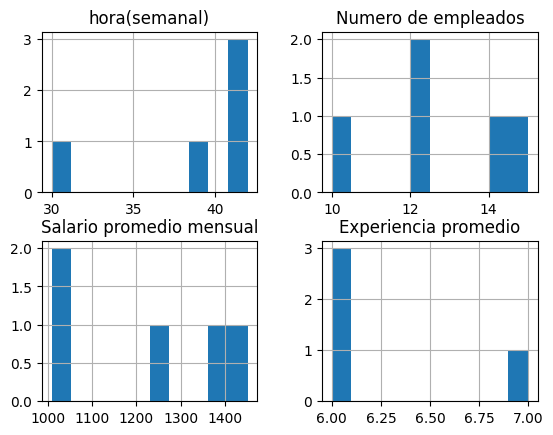

In [13]:
dataB.hist()

## Mejor opccion de rellenado de datos

In [22]:
#Calcular la media solo para las columnas numericas
valor_media=dataC.select_dtypes(include=['number']).mean()
# Rellenar datos nulos utilizando la media de la columna:
dataC=dataC.fillna(valor_media)
dataC

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.00,1278.25,6.5
1,Marketing,39,14.00,1009.00,6.5
2,Finanzas,41,15.00,1405.00,6.0
3,Proyectos,42,12.75,1450.00,7.0
4,Informatica,42,12.00,1249.00,6.5


## coreccion de datos no nulos pero fallidos como en lugar de numero esten "##"... o cualquiera

In [23]:
dataD=pd.read_csv('./Datasets/datosErroneos.txt')
dataD

,Departamento,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,Recursos humanos,30,10.0,NaN,NaN
1,Marketing,##,14.0,1009,NaN
2,Finanzas,41,15.0,1405,6.0
3,Proyectos,42,NaN,3d,7.0
4,Informatica,42,12.0,1249,NaN


In [24]:
dataD = dataD.drop("Departamento", axis=1)  # quitamos la columan Departamento




In [25]:
dataD

,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,30,10.0,NaN,NaN
1,##,14.0,1009,NaN
2,41,15.0,1405,6.0
3,42,NaN,3d,7.0
4,42,12.0,1249,NaN


In [26]:
#todos los valores no numericos los convierte en nulos
dataD = dataD.apply(pd.to_numeric, errors='coerce') 
dataD


,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,30.0,10.0,NaN,NaN
1,NaN,14.0,1009.0,NaN
2,41.0,15.0,1405.0,6.0
3,42.0,NaN,NaN,7.0
4,42.0,12.0,1249.0,NaN


In [29]:
#rellenamos esos valores nulos con la media de cada columna repectiva
valor_media=dataD.select_dtypes(include=['number']).mean()
dataD=dataD.fillna(valor_media)
dataD

,hora(semanal),Numero de empleados,Salario promedio mensual,Experiencia promedio
0,30.00,10.00,1221.0,6.5
1,38.75,14.00,1009.0,6.5
2,41.00,15.00,1405.0,6.0
3,42.00,12.75,1221.0,7.0
4,42.00,12.00,1249.0,6.5
